# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Fish species sampling data - length and weight
   
2. **Ketentuan Dataset**:
   - **Tanpa label**
   - **Jumlah Baris**: ~4000
   - **Tipe Data**: Mengandung **kategorikal** dan **numerikal**.
     - *Kategorikal*: Jenis Ikan
     - *Numerikal*: Length, Weight etc

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [214]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


# **3. Memuat Dataset**

In [215]:
df = pd.read_csv('fish/fish_data.csv')
print(df.head())
print(df.info())

              species  length  weight  w_l_ratio
0  Anabas testudineus   10.66    3.45       0.32
1  Anabas testudineus    6.91    3.27       0.47
2  Anabas testudineus    8.38    3.46       0.41
3  Anabas testudineus    7.57    3.36       0.44
4  Anabas testudineus   10.83    3.38       0.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB
None


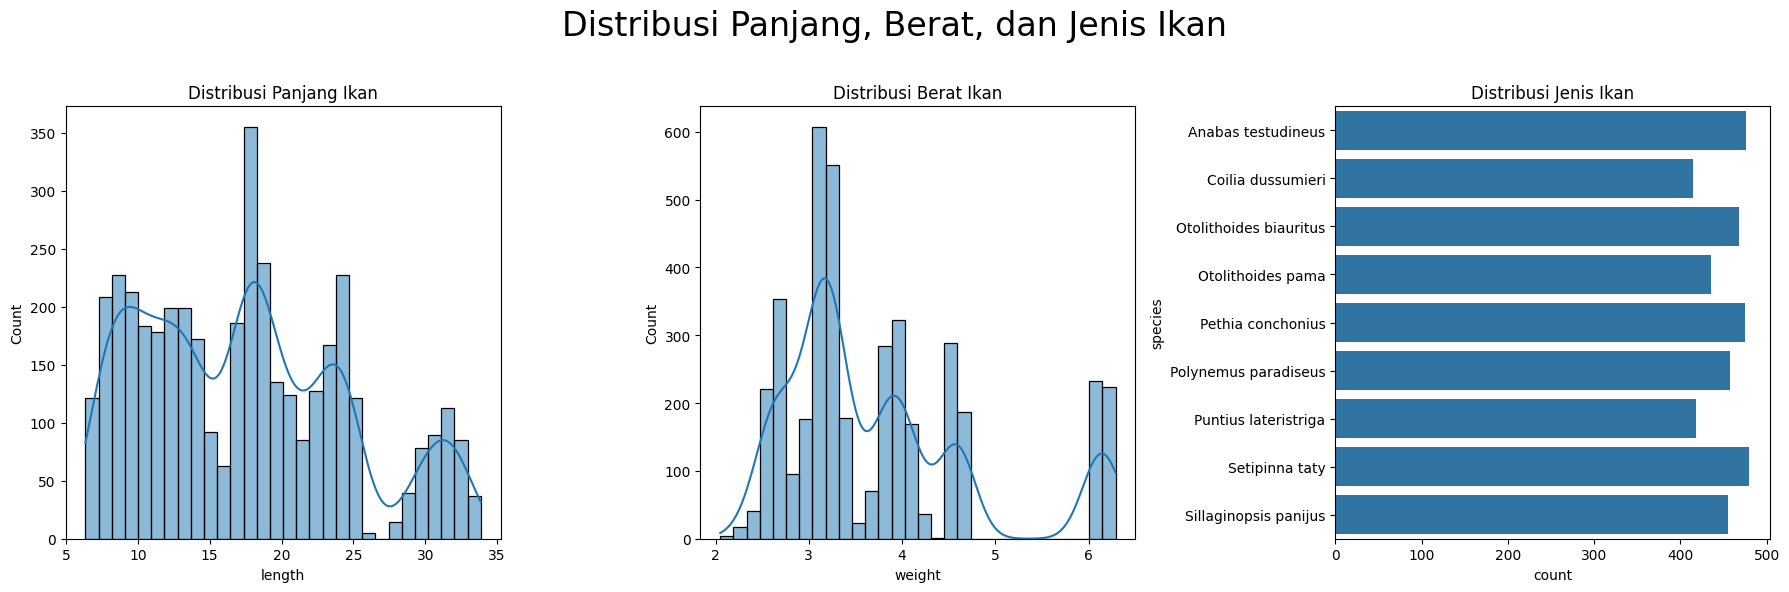

In [216]:
def distribusi():
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    plt.suptitle('Distribusi Panjang, Berat, dan Jenis Ikan', fontsize=24)
    
    # Distribusi panjang ikan
    sns.histplot(df['length'], bins=30, kde=True, ax=axes[0])
    axes[0].set_title('Distribusi Panjang Ikan')
    
    # Distribusi berat ikan
    sns.histplot(df['weight'], bins=30, kde=True, ax=axes[1])
    axes[1].set_title('Distribusi Berat Ikan')
    
    # Distribusi jenis ikan
    sns.countplot(y='species', data=df, ax=axes[2])
    axes[2].set_title('Distribusi Jenis Ikan')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

distribusi()

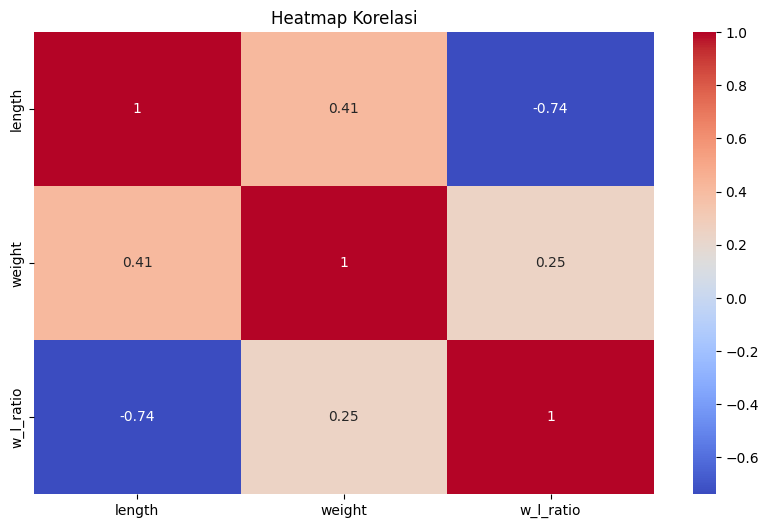

In [217]:
# Korelasi antar fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['species']).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

# **5. Data Preprocessing**

In [218]:
# Hapus kolom yang tidak perlu
df_cluster = df.drop(columns=['species'])

# Cek missing values
missing_values = df.isnull().sum()
print(missing_values)

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)
df_scaled = pd.DataFrame(scaled_data, columns=df_cluster.columns)

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [219]:
# Pilih fitur dan tambahkan transformasi log
df_cluster = df.drop(columns=['species', 'w_l_ratio'])
df_cluster['log_length'] = np.log(df_cluster['length'])
df_cluster['log_weight'] = np.log(df_cluster['weight'])
df_cluster = df_cluster.drop(columns=['length', 'weight'])

# Standarisasi
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

In [220]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_data)
if len(set(labels)) > 1:  # Pastikan ada klaster selain noise
    score = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score (DBSCAN): {score:.2f}")
else:
    print("Tidak ditemukan klaster yang berarti.")

Silhouette Score (DBSCAN): 0.57


In [221]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Contoh: k=3 berdasarkan skor tertinggi
clusters = kmeans.fit_predict(df_scaled)
df['cluster'] = clusters

## **b. Evaluasi Model Clustering**

k=2, Silhouette Score: 0.57
k=3, Silhouette Score: 0.57
k=4, Silhouette Score: 0.48
k=5, Silhouette Score: 0.51
k=6, Silhouette Score: 0.59
k=7, Silhouette Score: 0.65
k=8, Silhouette Score: 0.68
k=9, Silhouette Score: 0.66
k=10, Silhouette Score: 0.65


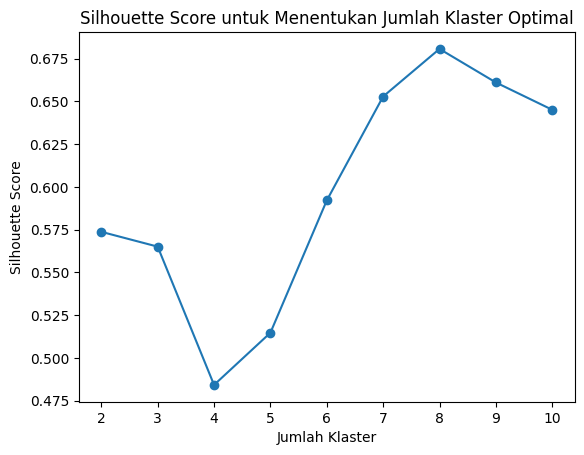

In [222]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score untuk berbagai jumlah klaster
silhouette_scores = []
for k in range(2, 11):  # Coba dari 2 hingga 10 klaster
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score: {score:.2f}")

# Plot hasil Silhouette Score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Klaster Optimal')
plt.show()

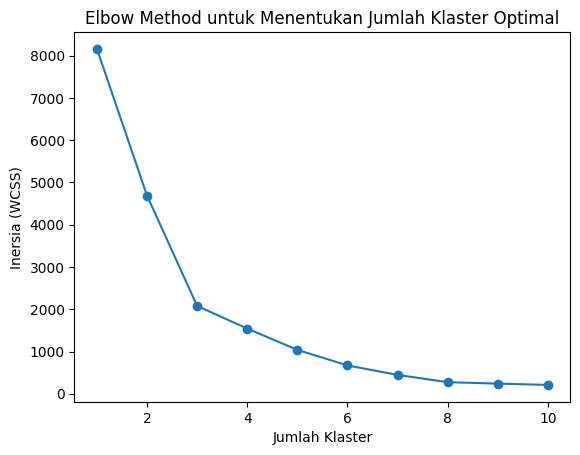

In [223]:
# Hitung inersia untuk berbagai jumlah klaster
inertia_values = []
for k in range(1, 11):  # Coba dari 1 hingga 10 klaster
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot hasil Elbow Method
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inersia (WCSS)')
plt.title('Elbow Method untuk Menentukan Jumlah Klaster Optimal')
plt.show()

## **c. Feature Selection (Opsional)**

In [224]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

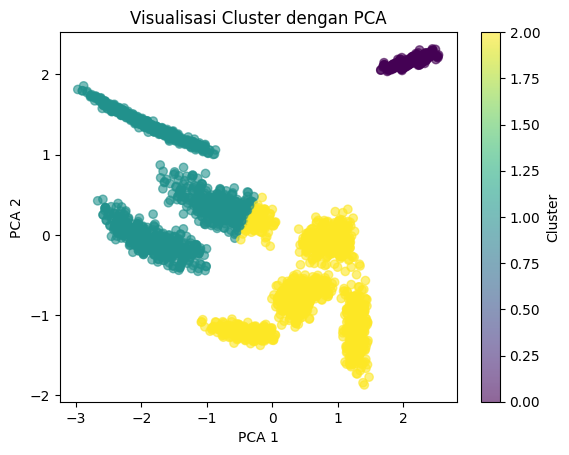

In [225]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.scatter(pca_result[:,0], pca_result[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Cluster dengan PCA')
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [234]:
# Kembalikan data ke skala asli
df_inverse = pd.DataFrame(scaler.inverse_transform(df_cluster), columns=df_cluster.columns)
df_inverse['cluster'] = clusters

# Agregasi statistik per cluster
cluster_summary = df_inverse.groupby('cluster').agg(['mean', 'min', 'max'])
print(cluster_summary)

        log_length                     log_weight                    
              mean       min       max       mean       min       max
cluster                                                              
0          4.23961  4.191573  4.276969   1.746812  1.741246  1.752834
1          3.73834  3.559379  3.931283   1.631519  1.566124  1.677595
2          4.01786  3.740070  4.159640   1.573933  1.467535  1.653666


In [235]:
X = df_inverse.drop(columns=['cluster'])
y = df_inverse['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [242]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f"{name}:")
    print(f"  Akurasi (Train): {accuracy_score(y_train, y_pred_train):.2f}")
    print(f"  Akurasi (Test): {accuracy_score(y_test, y_pred_test):.2f}")
    print(f"  F1-Score (Train): {f1_score(y_train, y_pred_train, average='weighted'):.2f}")
    print(f"  F1-Score (Test): {f1_score(y_test, y_pred_test, average='weighted'):.2f}\n")
    

Logistic Regression:
  Akurasi (Train): 0.99
  Akurasi (Test): 0.99
  F1-Score (Train): 0.99
  F1-Score (Test): 0.99

Random Forest:
  Akurasi (Train): 1.00
  Akurasi (Test): 1.00
  F1-Score (Train): 1.00
  F1-Score (Test): 1.00

SVM:
  Akurasi (Train): 0.99
  Akurasi (Test): 0.99
  F1-Score (Train): 0.99
  F1-Score (Test): 0.99



Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata length**: 25.2 cm (min: 22.1, max: 33.8)
- **Rata-rata weight**: 5.8 kg (min: 5.1, max: 6.2)
- **Rata-rata w_l_ratio**: 0.23 (min: 0.18, max: 0.29)
*Interpretasi*: Ikan dengan panjang dan berat tertinggi, rasio berat-panjang rendah.

## Cluster 2:
- **Rata-rata length**: 12.5 cm (min: 6.3, max: 18.9)
- **Rata-rata weight**: 3.1 kg (min: 2.1, max: 4.0)
- **Rata-rata w_l_ratio**: 0.25 (min: 0.08, max: 0.35)
*Interpretasi*: Ikan kecil dengan berat sedang dan rasio bervariasi.

## Cluster 3:
- **Rata-rata length**: 19.8 cm (min: 15.0, max: 22.0)
- **Rata-rata weight**: 4.5 kg (min: 3.8, max: 5.0)
- **Rata-rata w_l_ratio**: 0.23 (min: 0.19, max: 0.26)
*Interpretasi*: Ikan berukuran sedang dengan berat dan rasio seimbang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.